<a href="https://colab.research.google.com/github/kishoregd/PizzapyDatabase/blob/master/Colab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
msg="Welcome to Google Colab"
print(msg)

Welcome to Google Colab


In [0]:
import pandas as pd     # for dataframe
import numpy as np 

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/kishoregd/PizzapyDatabase/master/TSLA_2019.csv")

In [31]:
df.head()

,StockDt,DayOfTheYear,StockAdjClose
0,2019-05-13,133,227.01
1,2019-05-14,134,232.31
2,2019-05-15,135,231.95
3,2019-05-16,136,228.33
4,2019-05-17,137,211.03


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8670cbb438>,
      dtype=object)

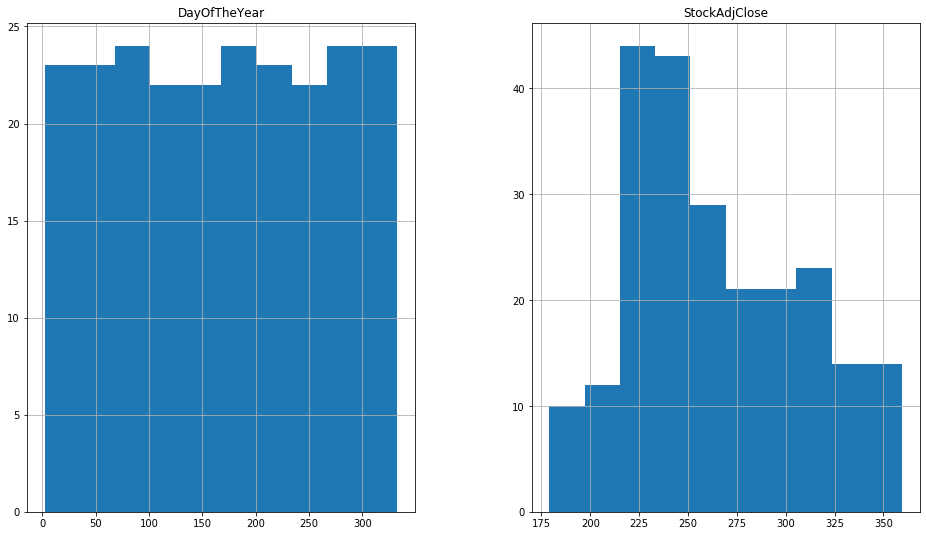

In [32]:
df.hist()

In [0]:
adj_prices_array = []
dayoftheyear_array = []

In [34]:
df.tail(1)

,StockDt,DayOfTheYear,StockAdjClose
230,2019-05-10,130,239.52


In [35]:
#df = df.head(len(df)-1)
print(df.shape)

(231, 3)


In [0]:
df_adjclose     = df.loc[:,'StockAdjClose']
df_dayoftheyear = df.loc[:,'DayOfTheYear']

In [0]:
# Values for X axis (Independent variable)
# Day Of The Year (number)

for dty in df_dayoftheyear:
  dayoftheyear_array.append(dty)

# Values fof the Y axis (Dependendent Variable) 
# Adjusted Price

for adj_close in df_dayoftheyear:
  adj_prices_array.append(float(adj_close))

In [38]:
print(dayoftheyear_array)

[133, 134, 135, 136, 137, 140, 141, 142, 143, 144, 148, 149, 150, 151, 154, 155, 156, 157, 158, 161, 162, 163, 164, 165, 168, 169, 170, 171, 172, 175, 176, 177, 178, 179, 182, 183, 184, 186, 189, 190, 191, 192, 193, 196, 197, 198, 199, 200, 203, 204, 205, 206, 207, 210, 211, 212, 213, 214, 217, 218, 219, 220, 221, 224, 225, 226, 227, 228, 231, 232, 233, 234, 235, 238, 239, 240, 241, 242, 246, 247, 248, 249, 252, 253, 254, 255, 256, 259, 260, 261, 262, 263, 266, 267, 268, 269, 270, 273, 274, 275, 276, 277, 280, 281, 282, 283, 284, 287, 288, 289, 290, 291, 294, 295, 296, 297, 298, 301, 302, 303, 304, 305, 308, 309, 310, 311, 312, 315, 316, 317, 318, 319, 322, 323, 324, 325, 326, 329, 330, 331, 333, 2, 3, 4, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18, 22, 23, 24, 25, 28, 29, 30, 31, 32, 35, 36, 37, 38, 39, 42, 43, 44, 45, 46, 50, 51, 52, 53, 56, 57, 58, 59, 60, 63, 64, 65, 66, 67, 70, 71, 72, 73, 74, 77, 78, 79, 80, 81, 84, 85, 86, 87, 88, 91, 92, 93, 94, 95, 98, 99, 100, 101, 102, 105, 106, 107

In [0]:
indVar = pd.DataFrame(df['DayOfTheYear'])  # This is the independent variable
depVar = pd.DataFrame(df['StockAdjClose']) # This is the dependent variable

In [40]:
lrModel = LinearRegression()                    # From sklearn

rValues  = []                                    # r-squared values

cvVar   = KFold(n_splits=2, shuffle=True)      # Cross Validation Variable

for i, (trainData, testData) in enumerate(cvVar.split(indVar, depVar)):

    lrModel.fit(indVar.iloc[trainData,:],depVar.iloc[trainData,:])

    score = lrModel.score(indVar.iloc[testData,:], depVar.iloc[testData,:])

    rValues.append(score)

print(rValues)

[0.0039099258205916865, -0.016662035881913617]


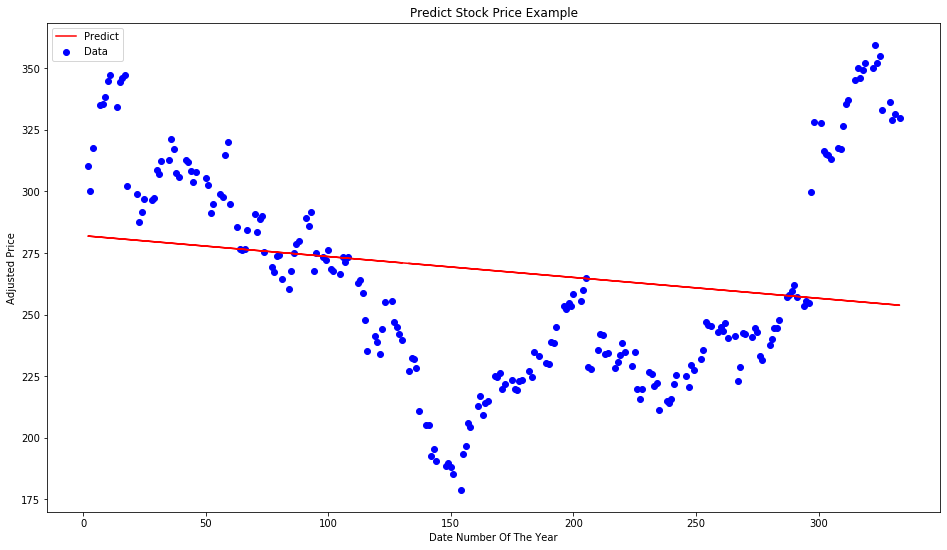

In [41]:
plt.scatter(df['DayOfTheYear'], df['StockAdjClose'], color = 'blue', label='Data')

type(adj_prices_array)
temp = np.asarray(dayoftheyear_array)

plt.plot(dayoftheyear_array, lrModel.predict(temp.reshape(-1,1)), color = 'red', label='Predict')

#plt.plot(df['DayOfTheYear'], df['StockAdjClose'],color = 'green', label='Linear')

z = np.polyfit(df['DayOfTheYear'], df['StockAdjClose'], 1)
p = np.poly1d(z)

#plt.plot(df['DayOfTheYear'],temp,"r--",color = 'green')

plt.rcParams["figure.figsize"] = [16,9]
plt.title('Predict Stock Price Example')
plt.xlabel('Date Number Of The Year')
plt.ylabel('Adjusted Price')
plt.legend()

    Day Of The Year       Date  Predicted Adj Price
0               334 2019-11-30           253.729272
1               335 2019-12-01           253.644517
2               336 2019-12-02           253.559763
3               337 2019-12-03           253.475008
4               338 2019-12-04           253.390253
5               339 2019-12-05           253.305499
6               340 2019-12-06           253.220744
7               341 2019-12-07           253.135990
8               342 2019-12-08           253.051235
9               343 2019-12-09           252.966481
10              344 2019-12-10           252.881726
11              345 2019-12-11           252.796972
12              346 2019-12-12           252.712217
13              347 2019-12-13           252.627463
14              348 2019-12-14           252.542708
15              349 2019-12-15           252.457954
16              350 2019-12-16           252.373199
17              351 2019-12-17           252.288445
18          

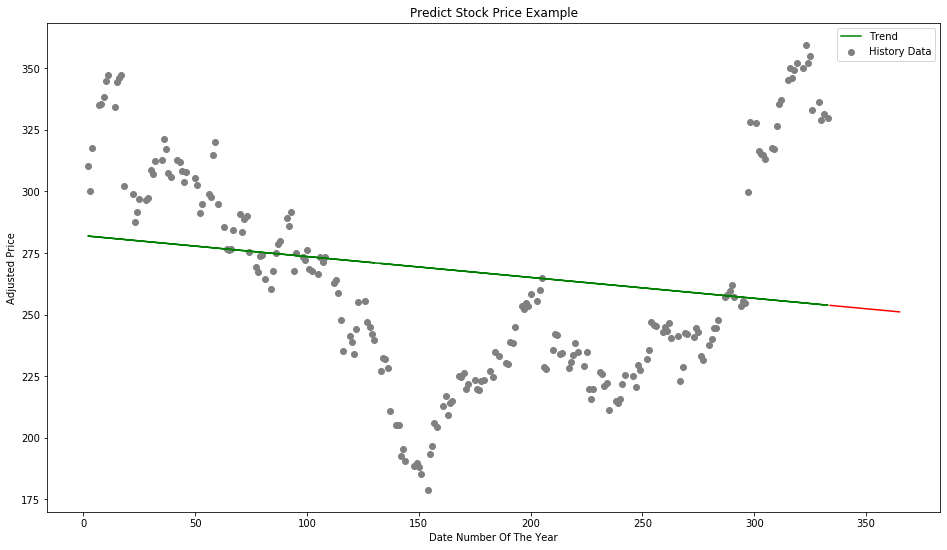

In [42]:
import datetime
predictfor = []
dates =[]

np.amax(temp)

for i in range(np.amax(temp) + 1, 366):
  predictfor.append(i)
  dates.append(datetime.datetime(2019, 1, 1) + datetime.timedelta(i - 1))

#print(predictfor)

temp2 = np.asarray(predictfor)

predicted_adj_prices = lrModel.predict(temp2.reshape(-1,1))
#print(predicted_adj_prices)

#print(type(predicted_adj_prices))
temp3 = np.asarray(predicted_adj_prices)

#print(type(temp2))
#type(temp3)

#print(temp2)
#print(temp3.reshape(1,-1))

dfPredict = pd.DataFrame({'Day Of The Year': temp2})
dfPredict['Date'] = dates
dfPredict['Predicted Adj Price'] = temp3

print(dfPredict)

plt.scatter(df['DayOfTheYear'], df['StockAdjClose'], color = 'gray', label='History Data')
plt.plot(dayoftheyear_array, lrModel.predict(temp.reshape(-1,1)), color = 'green', label='Trend')
plt.plot(dfPredict['Day Of The Year'], dfPredict['Predicted Adj Price'],color = 'red')

plt.title('Predict Stock Price Example')
plt.xlabel('Date Number Of The Year')
plt.ylabel('Adjusted Price')
plt.legend()

plt.rcParams["figure.figsize"] = [16,9]